# Title: Champions League 2008 - 2009 - Predictions
## Author: Martin Ngoh 
### Date: 05/19/2024

In [1]:
# Load Packages 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor
from helper import regression_acc, bar_plot, residuals_plot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
# Load the Data 
df = pd.read_csv('champions_league_team_data_raw.csv')
df.columns

Index(['Squad', '# Pl', 'Age', 'MP', 'Starts', 'Gls', 'Ast', 'G+A', 'G-PK',
       'PK', 'PKatt', 'CrdY', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK',
       'year'],
      dtype='object')

In [3]:
# Focus Columns
df = df.drop(['Squad', 'Starts', 'Ast','# Pl', 'G+A','Gls.1', 'Ast.1', 'G+A.1','G-PK',
       'G-PK.1','year','G+A-PK', 'PK'], axis=1)
df.columns

Index(['Age', 'MP', 'Gls', 'PKatt', 'CrdY'], dtype='object')

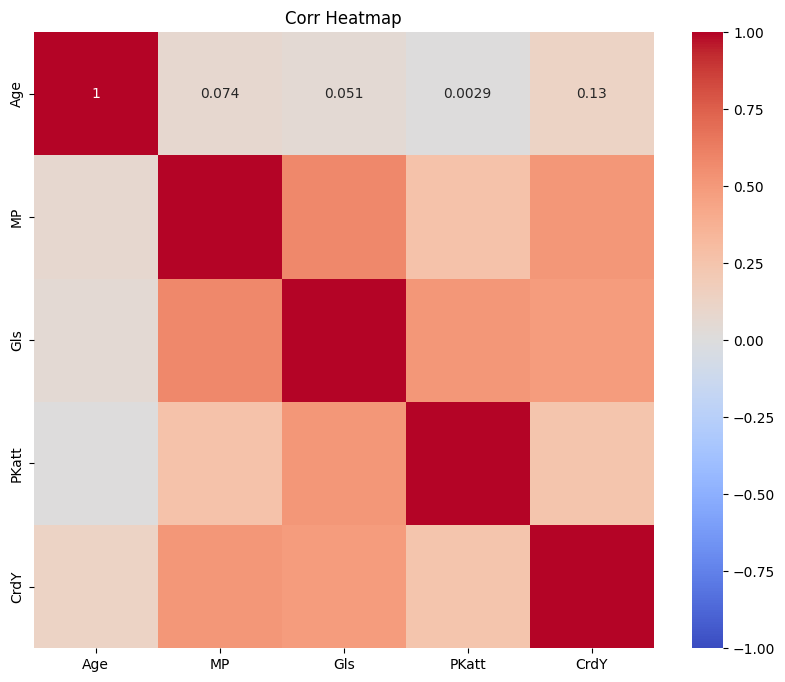

In [4]:
# Correlation Matrix 
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Corr Heatmap')
plt.show()

In [5]:
# Split X and Y
X = df.drop(['Gls'], axis=1).values
y = df['Gls'].values

In [6]:
# Train and Test
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=345)

In [7]:
# Linear Regeression
lr = LinearRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_test)

In [8]:
# Accuracy Measures 
avg_gls = df['Gls'].mean()
min_gls = df['Gls'].min()
max_gls = df['Gls'].max()
regression_acc(y_test, preds)
print(f'Max Amount of Goals per Team: {max_gls} Average Amount of Goals per Team: {avg_gls} Min Amount of Goals per Team: {min_gls}')

Add Model Type as: model = XXX
Max Amount of Goals per Team: 43 Average Amount of Goals per Team: 10.972916666666666 Min Amount of Goals per Team: 0


/Users/Martin1/Desktop/GIT/champions_league_22/helper.py:84: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=actuals, y=preds, ax=axes[1], palette='cool')


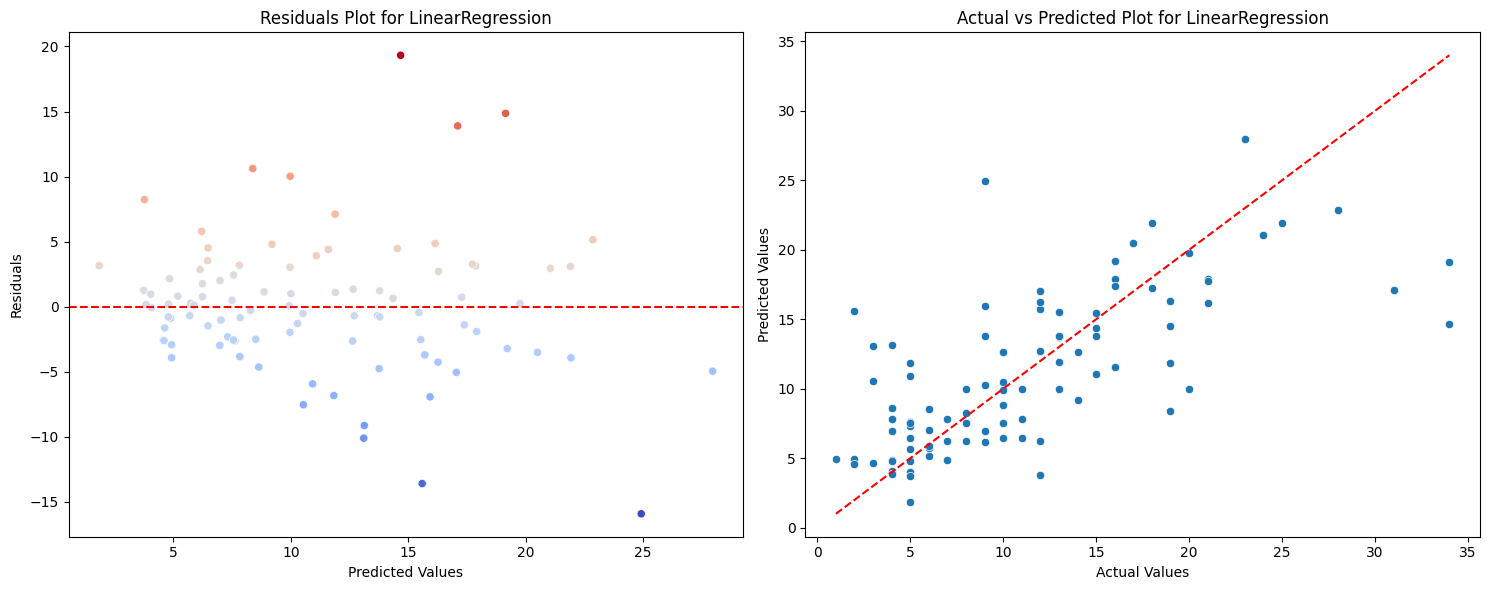

In [9]:
# Actuals VS Preds 
residuals_plot(actuals = y_test, preds = preds, model_name='LinearRegression')

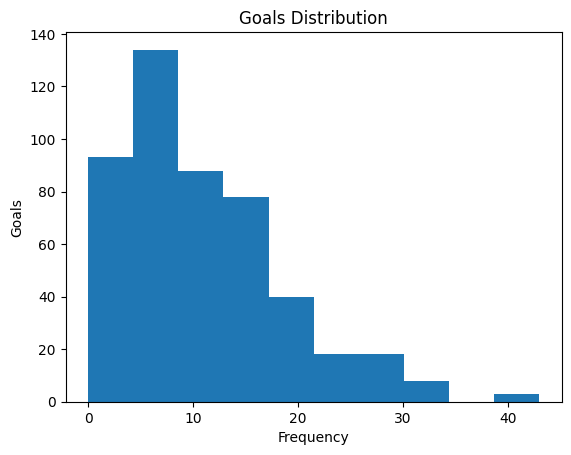

In [10]:
# Team Goal Distribution 
plt.hist(df['Gls'])
plt.title('Goals Distribution')
plt.xlabel('Frequency')
plt.ylabel('Goals')
plt.show()

# Improve Model 

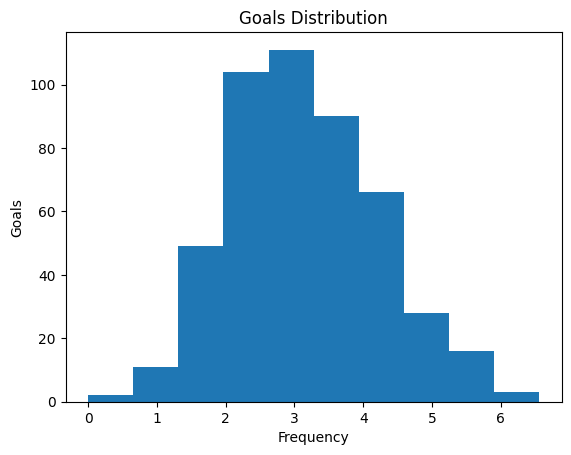

In [11]:
# Square Root Distribution
plt.hist(np.sqrt(df['Gls']))
plt.title('Goals Distribution')
plt.xlabel('Frequency')
plt.ylabel('Goals')
plt.show()

In [12]:
# Use that target Feature
y = np.sqrt(df['Gls']).values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=345)

# Improved Linear Model 

In [13]:
# Linear Regeression
lr = LinearRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_test)

In [14]:
# Accuracy Measures 
lr = regression_acc(y_test, preds, model = 'linearRegression')
print(f'Standard Deviation of Gls: {y.std().round(2)}')

     MAE    MSE   RMSE             Model
0  0.566  0.571  0.756  linearRegression
Standard Deviation of Gls: 1.14


/Users/Martin1/Desktop/GIT/champions_league_22/helper.py:84: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=actuals, y=preds, ax=axes[1], palette='cool')


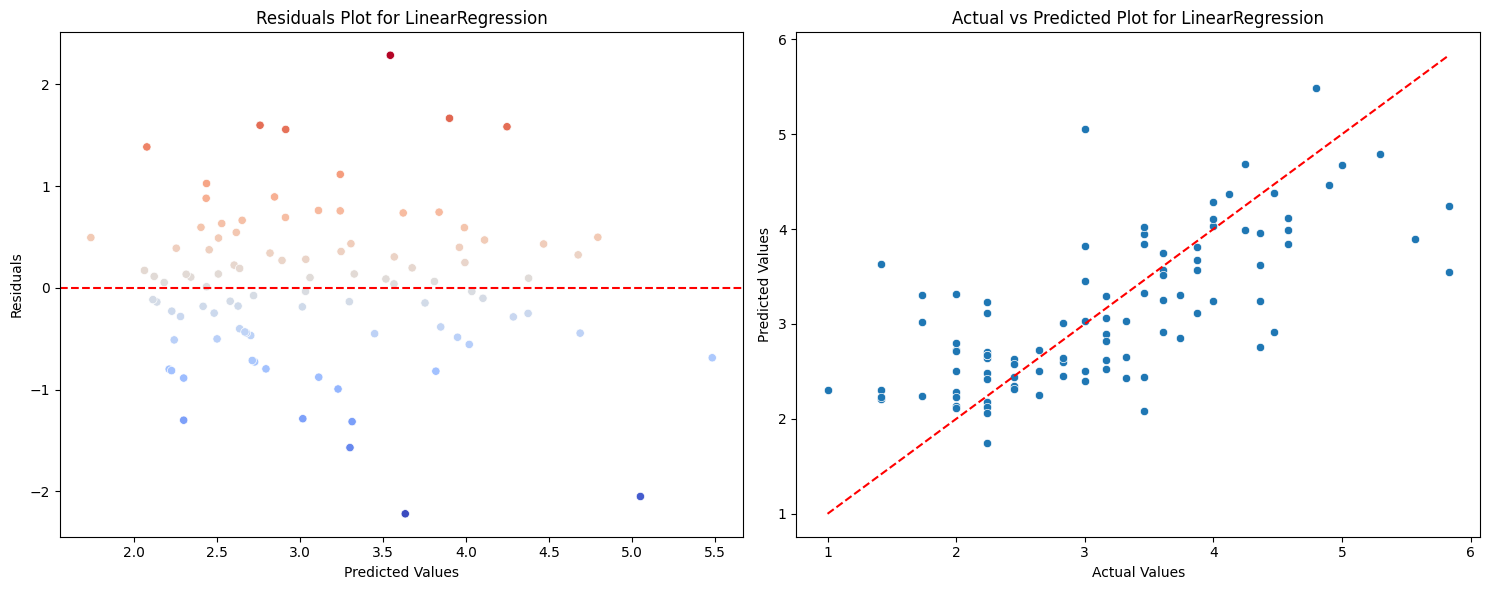

In [15]:
# Calculate residuals
residuals_plot(actuals = y_test, preds = preds, model_name='LinearRegression')

# Random Forest Model 

In [16]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)
print(f'Random Forest RMSE: {rf_rmse_scores.mean().round(2)}')

Random Forest RMSE: 0.82


In [17]:
# Hyperparameter Tuning 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 70],
    'min_samples_split': [2, 5, 70],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (MSE): {-grid_search.best_score_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (MSE): 0.6236497517185929


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
394 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.

In [18]:
# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
preds = best_rf.predict(x_test)
rf = regression_acc(y_test, preds, model='randomforest')

     MAE    MSE   RMSE         Model
0  0.497  0.453  0.673  randomforest


/Users/Martin1/Desktop/GIT/champions_league_22/helper.py:84: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=actuals, y=preds, ax=axes[1], palette='cool')


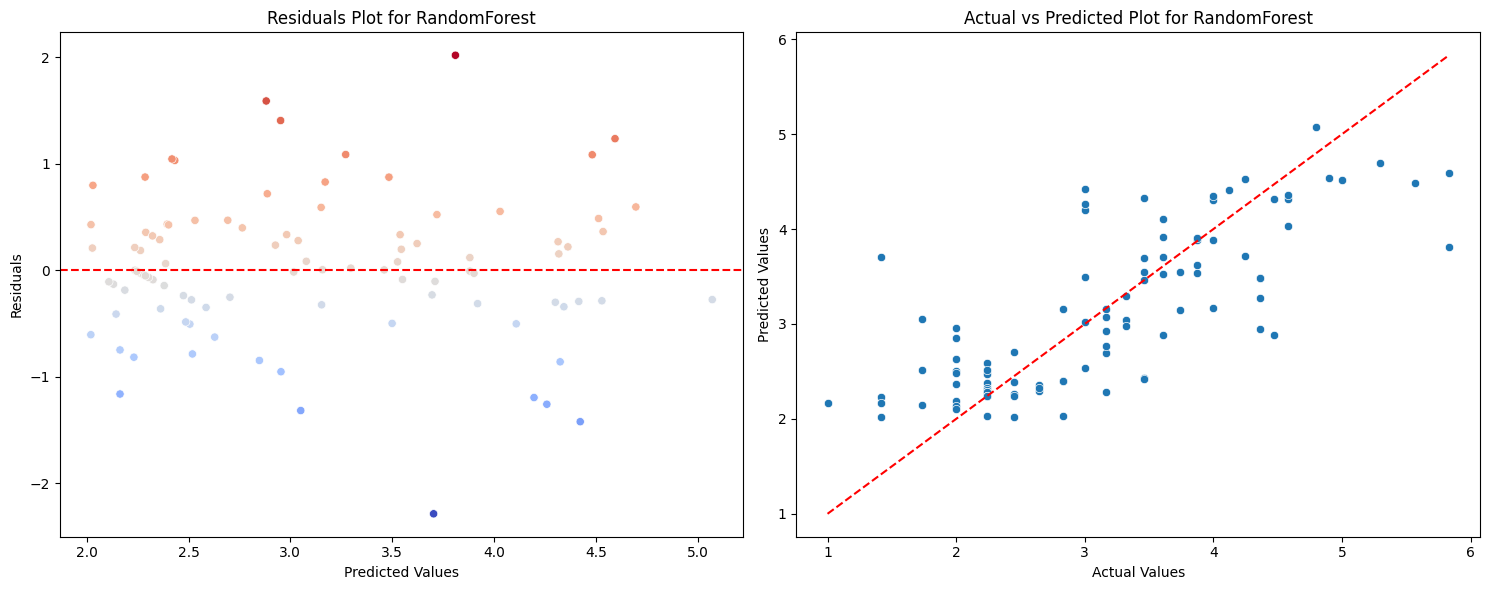

In [19]:
# Calculate residuals
residuals_plot(actuals = y_test, preds = preds, model_name='RandomForest')

# Ridge Regression 

In [20]:
# Ridge Regression
alpha_values = np.arange(0.001, 0.011, 0.001)
param_grid = {'alpha': alpha_values}
ridge = Ridge(alpha=1.0)
ridge_cv = GridSearchCV(ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(x_train, y_train)
best_alpha = ridge_cv.best_params_['alpha']
print(best_alpha)

# Fit the Model 
ride = Ridge(alpha = best_alpha)
ridge.fit(x_train, y_train)
preds = ridge.predict(x_test)

# Accuracies
rdg = regression_acc(y_test, preds, model='Ridge')

0.010000000000000002
     MAE    MSE   RMSE  Model
0  0.566  0.571  0.756  Ridge


/Users/Martin1/Desktop/GIT/champions_league_22/helper.py:84: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=actuals, y=preds, ax=axes[1], palette='cool')


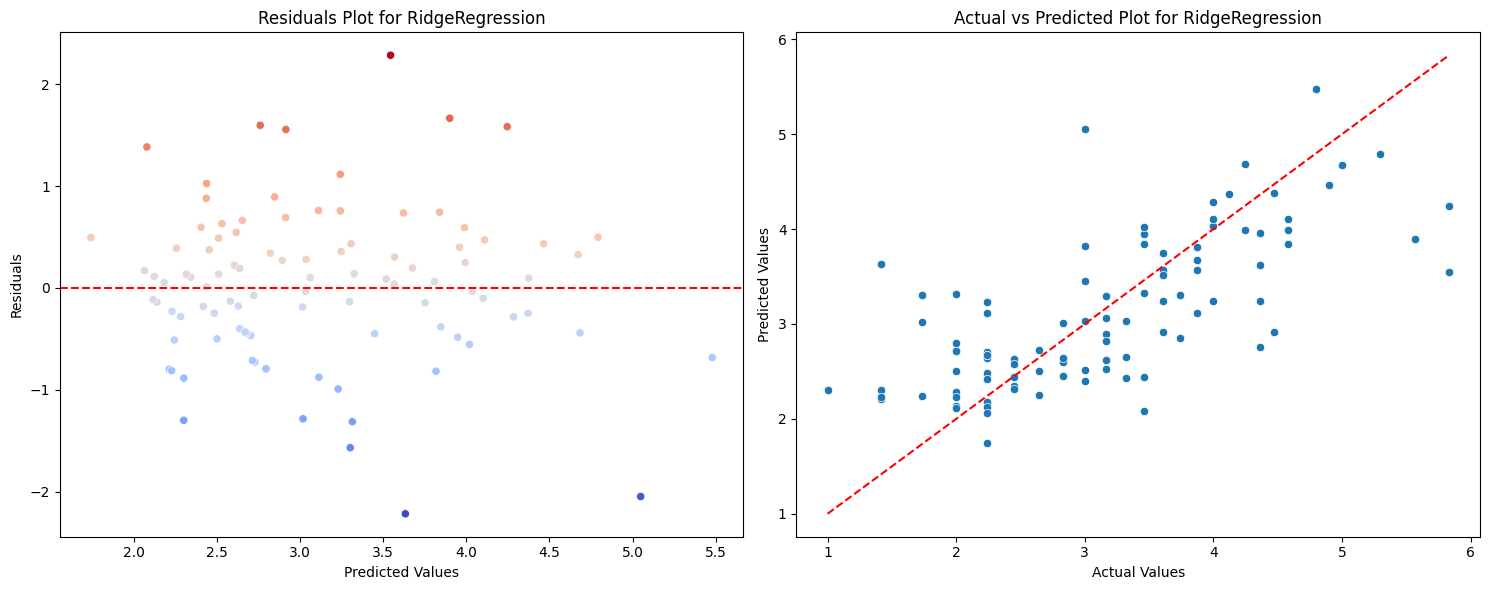

In [21]:
# Calculate Residuals
residuals_plot(actuals = y_test, preds = preds, model_name='RidgeRegression')

# Lasso Regression 

In [22]:
# Ridge Regression
alpha_values = np.arange(0.001, 0.011, 0.001)
param_grid = {'alpha': alpha_values}
lasso = Lasso(alpha=1.0)
lasso_cv = GridSearchCV(lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(x_train, y_train)
best_alpha = lasso_cv.best_params_['alpha']
print(best_alpha)

# Fit the Model 
lasso = Lasso(alpha = best_alpha)
lasso.fit(x_train, y_train)
preds = lasso.predict(x_test)

# Accuracies
lso = regression_acc(y_test, preds, model='Lasso')

0.010000000000000002
     MAE    MSE   RMSE  Model
0  0.565  0.568  0.754  Lasso


/Users/Martin1/Desktop/GIT/champions_league_22/helper.py:84: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=actuals, y=preds, ax=axes[1], palette='cool')


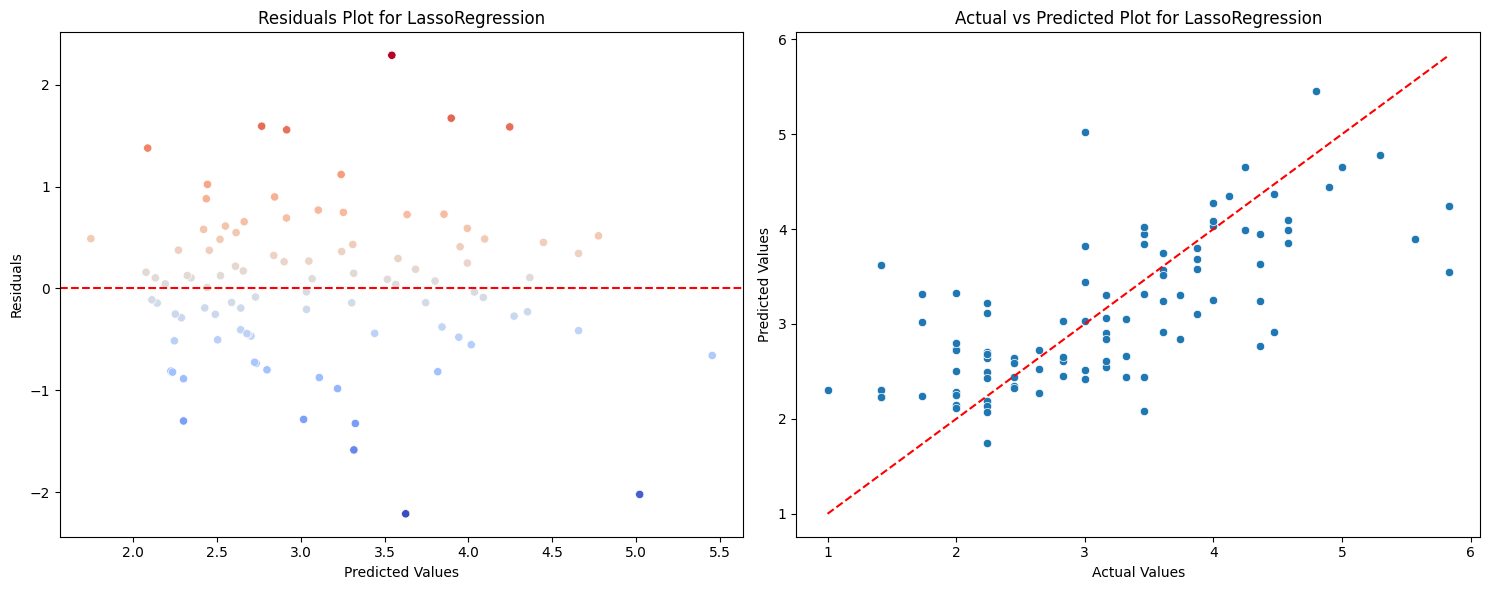

In [23]:
# Calculate Residuals
residuals_plot(actuals = y_test, preds = preds, model_name='LassoRegression')

# XGBoost 

In [24]:
# Param Grid
param_dict = {
    'n_estimators': [50, 100, 200],     # Number of trees
    'max_depth': [3, 4, 5, 6],          # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1], # Step size shrinkage used in update to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],       # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0] # Subsample ratio of columns when constructing each tree
}
xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, param_grid=param_dict, cv=5, scoring='neg_mean_squared_error')
xgb_cv.fit(x_train, y_train)
best_params = xgb_cv.best_params_

# New Model With Best Params 
xgb = XGBRegressor(**best_params)
xgb.fit(x_train, y_train)
preds = xgb.predict(x_test)
xgb_scores = regression_acc(y_test, preds, model = 'xgb')
print('Done with XGB Model')

     MAE    MSE   RMSE Model
0  0.499  0.418  0.647   xgb
Done with XGB Model


/Users/Martin1/Desktop/GIT/champions_league_22/helper.py:84: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=actuals, y=preds, ax=axes[1], palette='cool')


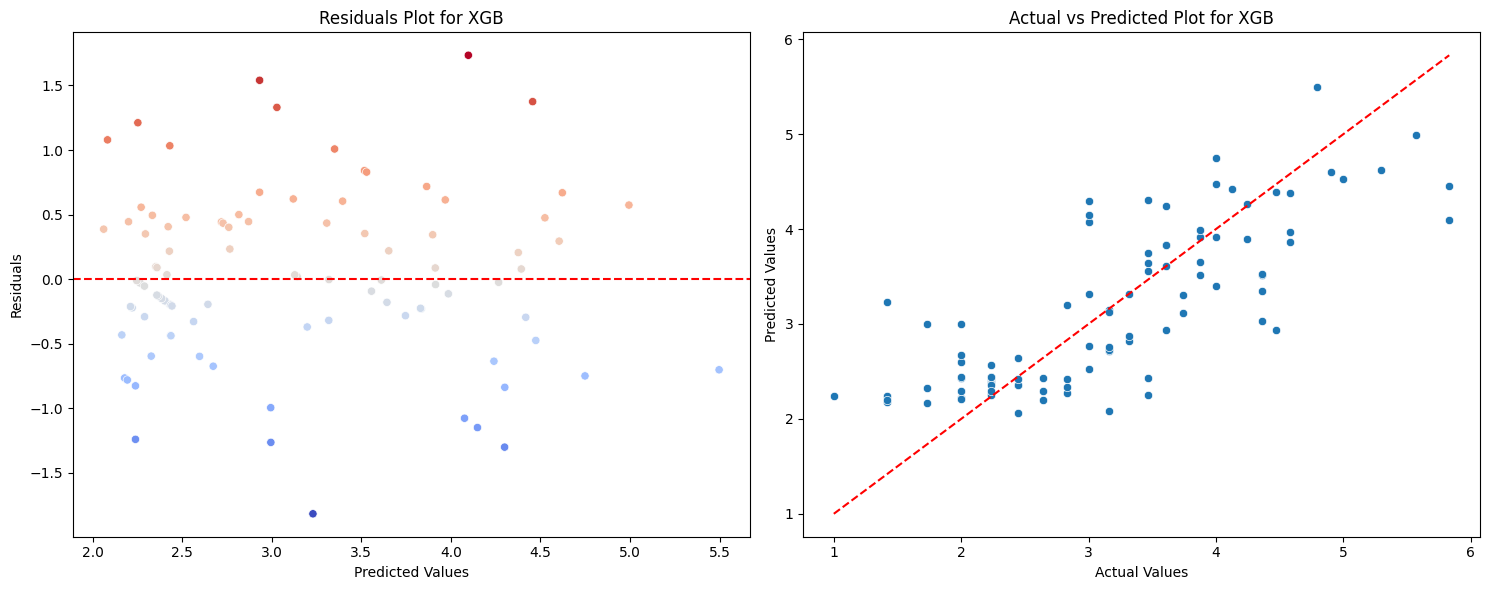

In [25]:
# Calculate Residuals
residuals_plot(actuals = y_test, preds = preds, model_name='XGB')

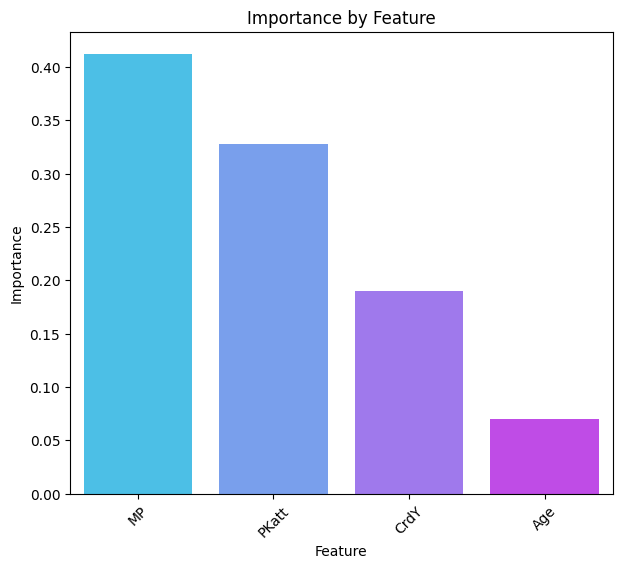

In [36]:
# Get feature importances
X = df.drop(['Gls'], axis=1)
feature_importances = xgb.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Bar Plot 
bar_plot(x='Feature', y='Importance', df=feature_importance_df)


# Aggregate Scores 

In [37]:
# Combine DFs 
lr = pd.concat([lr, rf, rdg, lso, xgb_scores])
lr = lr.sort_values(by='RMSE')

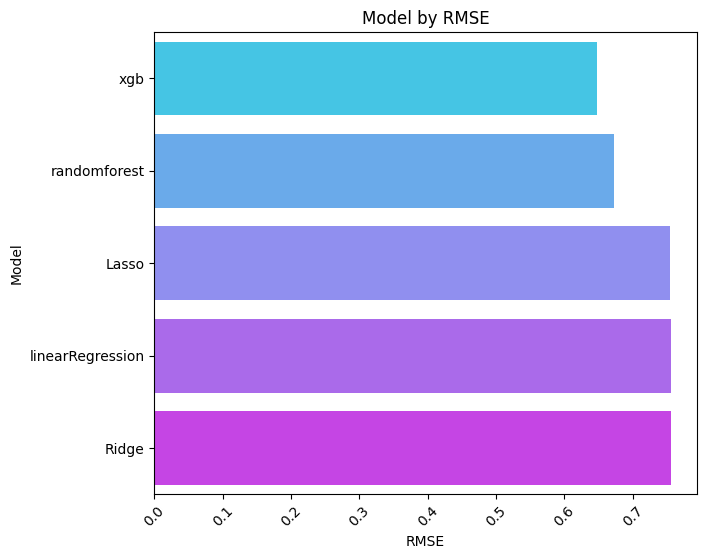

In [38]:
# Plot the RMSE 
bar_plot(x='RMSE', y='Model', df = lr)

# Save Out Best Model 

In [42]:
# Save Out Model 
xgb.save_model('xgb_model.json')
# Save Train Cols 
feature_names = X.columns.to_list()  
np.save('train_cols.npy', feature_names)